# Animal Classification Model

In [ ]:
# Importing essential libraries and activating gpu in the system.
import tensorflow as tf 
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import os
os.environ['CUDA_DEVICE_ORDER']="PCI_BUS_ID"
os.environ['CUDA_VISIBLE DEVICES']="0"

In [2]:
# Importing required libraries to build Convolutional Neural Networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,GlobalAveragePooling2D


In [3]:
# Importing image library
from tensorflow.keras.preprocessing import image

In [5]:
# Downloading Efficient Net Model
eff_net=tf.keras.applications.EfficientNetB0()

In [6]:
# The below table describes the structure of the imported neural network 
eff_net.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization[0][0]              
_____________________________________________________________________________________

Total params: 5,330,571
Trainable params: 5,288,548
Non-trainable params: 42,023
__________________________________________________________________________________________________


In [6]:
# Creating a base model with only the CNN structure
base_model=tf.keras.applications.EfficientNetB0(input_shape=(224,224,3),include_top=False)
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, 224, 224, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
normalization_1 (Normalization) (None, 224, 224, 3)  7           rescaling_1[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization_1[0][0]            
_____________________________________________________________________________________

In [7]:
# Finding out if base model is trainable or not.
base_model.trainable

True

In [8]:
# Freezing the base model
base_model.trainable=False

In [9]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, 224, 224, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
normalization_1 (Normalization) (None, 224, 224, 3)  7           rescaling_1[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization_1[0][0]            
_____________________________________________________________________________________

In [10]:
# Finetuning the Dense Layers while keeping the Convolutional structure as it is.
animal_model=Sequential()
animal_model.add(base_model)
animal_model.add(GlobalAveragePooling2D())
animal_model.add(Dense(1024,activation='relu'))

animal_model.add(Dense(512,activation='relu'))

animal_model.add(Dense(77,activation='softmax'))


In [11]:
animal_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb0 (Functional)  (None, 7, 7, 1280)        4049571   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1311744   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 77)                39501     
Total params: 5,925,616
Trainable params: 1,876,045
Non-trainable params: 4,049,571
_________________________________________________________________


In [12]:
# Performing Image Processing to make the images clear so that model is better interpreted
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
                  rotation_range=45,
                  width_shift_range=0.2,
                  height_shift_range=0.2,
                  shear_range=0.2,
                  zoom_range=0.2,
                  horizontal_flip=True,
                  fill_mode='reflect')
test_datagen=ImageDataGenerator(preprocessing_function=tf.keras.applications.efficientnet.preprocess_input)

In [13]:
train_datagen

In [14]:
# Defining Train and Test Data  through Data Generation function by mentioning the location of the directory. 
train_set=train_datagen.flow_from_directory('C:\\Users\\Dell\\Desktop\\DL\\animal_classification\\dataset\\Train',
                                    target_size=(224,224),
                                    batch_size=128,
                                    class_mode='categorical')

test_set=test_datagen.flow_from_directory('C:\\Users\\Dell\\Desktop\\DL\\animal_classification\\dataset\\Test',
                                    target_size=(224,224),
                                    batch_size=128,
                                    class_mode='categorical')



Found 2011 images belonging to 77 classes.
Found 720 images belonging to 77 classes.


In [15]:
# Using Compile to fit this data into our model and defining the measure to use inorder to asses the performance of the model.
animal_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
# Running epochs to improve the model and avoid underfitting or overfitting by comparing test and train data's performance 
animal_model.fit(train_set,
steps_per_epoch=2011//128,
epochs=10,
validation_data=test_set,
validation_steps=720//128)


Epoch 1/10
 9/15 [=================>............] - ETA: 41s - loss: 3.5732 - accuracy: 0.3094

C:\Users\Dell\anaconda3\envs\tf_env\lib\site-packages\PIL\Image.py:976: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


15/15 [==============================] - 155s 10s/step - loss: 2.8087 - accuracy: 0.4594 - val_loss: 1.1234 - val_accuracy: 0.7437
Epoch 2/10
15/15 [==============================] - 149s 10s/step - loss: 0.5812 - accuracy: 0.8518 - val_loss: 0.6649 - val_accuracy: 0.7922
Epoch 3/10
15/15 [==============================] - 152s 10s/step - loss: 0.3552 - accuracy: 0.8858 - val_loss: 0.5889 - val_accuracy: 0.8297
Epoch 4/10
15/15 [==============================] - 159s 11s/step - loss: 0.2226 - accuracy: 0.9368 - val_loss: 0.5576 - val_accuracy: 0.8672
Epoch 5/10
15/15 [==============================] - 181s 12s/step - loss: 0.1310 - accuracy: 0.9591 - val_loss: 0.4874 - val_accuracy: 0.8641
Epoch 6/10
15/15 [==============================] - 158s 11s/step - loss: 0.1162 - accuracy: 0.9676 - val_loss: 0.5259 - val_accuracy: 0.8578
Epoch 7/10
15/15 [==============================] - 154s 10s/step - loss: 0.0973 - accuracy: 0.9750 - val_loss: 0.5173 - val_accuracy: 0.8625
Epoch 8/10
15/15 

In [ ]:
# Therefore as we are getting 87% as the validation accuracy at the end of 10 epochs with no significant overfitting or underfitting problem . We proceed to the next step.

{'African LionFish': 0, 'American Bison': 1, 'American White Ibis': 2, 'Andean Condor': 3, 'Ankylosaurus': 4, 'Ant': 5, 'Bald Eagle': 6, 'BigHorn Sheep': 7, 'Black Rat': 8, 'Blue Whale': 9, 'Cat': 10, 'Cheetah': 11, 'Chicken': 12, 'Coelacanth': 13, 'Common BottleNose Dolphin': 14, 'Common Eland': 15, 'Cougar': 16, 'Crested Auklet': 17, 'Crocodile': 18, 'Diplodocus': 19, 'Domestic Cow': 20, 'Domestic Dog': 21, 'Dugong': 22, 'Eastern KingBird': 23, 'Eastern Tiger SwallowTail': 24, 'Gharial': 25, 'Giant Pacific Octopus': 26, 'Gorilla': 27, 'Great HammerHead Shark': 28, 'Great White Shark': 29, 'Green Anaconda': 30, 'Green Iguana': 31, 'Grizzly Bear': 32, 'Hippopotamus': 33, 'Horse': 34, 'Humpback Whale': 35, 'Iguanadon': 36, 'Jaguar': 37, 'Killer Whale': 38, 'King Cobra': 39, 'Komodo Dragon': 40, 'Leopard': 41, 'Lesser Blue Ringed Octopus': 42, 'Lion': 43, 'Modern Humans': 44, 'Monarch Butterfly': 45, 'Northern Flicker': 46, 'Northern Giraffee': 47, 'Northern Harrier': 48, 'Orangutan': 49

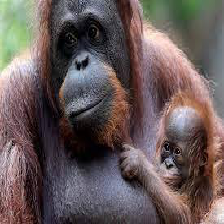

In [18]:
# Checking if the model is predicting the animals accurately .
test_img=image.load_img('C:\\Users\\Dell\\Desktop\\DL\\animal_classification\\dataset\\example\\5.jpg',target_size=(224,224))
test_img1=image.img_to_array(test_img)






test_img2=np.expand_dims(test_img1,axis=0)



ypred=animal_model.predict(test_img2)
print(train_set.class_indices)



print('The test image class is :',ypred.argmax())
test_img


{'African LionFish': 0, 'American Bison': 1, 'American White Ibis': 2, 'Andean Condor': 3, 'Ankylosaurus': 4, 'Ant': 5, 'Bald Eagle': 6, 'BigHorn Sheep': 7, 'Black Rat': 8, 'Blue Whale': 9, 'Cat': 10, 'Cheetah': 11, 'Chicken': 12, 'Coelacanth': 13, 'Common BottleNose Dolphin': 14, 'Common Eland': 15, 'Cougar': 16, 'Crested Auklet': 17, 'Crocodile': 18, 'Diplodocus': 19, 'Domestic Cow': 20, 'Domestic Dog': 21, 'Dugong': 22, 'Eastern KingBird': 23, 'Eastern Tiger SwallowTail': 24, 'Gharial': 25, 'Giant Pacific Octopus': 26, 'Gorilla': 27, 'Great HammerHead Shark': 28, 'Great White Shark': 29, 'Green Anaconda': 30, 'Green Iguana': 31, 'Grizzly Bear': 32, 'Hippopotamus': 33, 'Horse': 34, 'Humpback Whale': 35, 'Iguanadon': 36, 'Jaguar': 37, 'Killer Whale': 38, 'King Cobra': 39, 'Komodo Dragon': 40, 'Leopard': 41, 'Lesser Blue Ringed Octopus': 42, 'Lion': 43, 'Modern Humans': 44, 'Monarch Butterfly': 45, 'Northern Flicker': 46, 'Northern Giraffee': 47, 'Northern Harrier': 48, 'Orangutan': 49

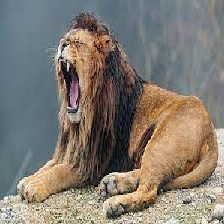

In [19]:
test_img=image.load_img('C:\\Users\\Dell\\Desktop\\DL\\animal_classification\\dataset\\example\\2.jpg',target_size=(224,224))
test_img1=image.img_to_array(test_img)






test_img2=np.expand_dims(test_img1,axis=0)



ypred=animal_model.predict(test_img2)
print(train_set.class_indices)



print('The test image class is :',ypred.argmax())
test_img

{'African LionFish': 0, 'American Bison': 1, 'American White Ibis': 2, 'Andean Condor': 3, 'Ankylosaurus': 4, 'Ant': 5, 'Bald Eagle': 6, 'BigHorn Sheep': 7, 'Black Rat': 8, 'Blue Whale': 9, 'Cat': 10, 'Cheetah': 11, 'Chicken': 12, 'Coelacanth': 13, 'Common BottleNose Dolphin': 14, 'Common Eland': 15, 'Cougar': 16, 'Crested Auklet': 17, 'Crocodile': 18, 'Diplodocus': 19, 'Domestic Cow': 20, 'Domestic Dog': 21, 'Dugong': 22, 'Eastern KingBird': 23, 'Eastern Tiger SwallowTail': 24, 'Gharial': 25, 'Giant Pacific Octopus': 26, 'Gorilla': 27, 'Great HammerHead Shark': 28, 'Great White Shark': 29, 'Green Anaconda': 30, 'Green Iguana': 31, 'Grizzly Bear': 32, 'Hippopotamus': 33, 'Horse': 34, 'Humpback Whale': 35, 'Iguanadon': 36, 'Jaguar': 37, 'Killer Whale': 38, 'King Cobra': 39, 'Komodo Dragon': 40, 'Leopard': 41, 'Lesser Blue Ringed Octopus': 42, 'Lion': 43, 'Modern Humans': 44, 'Monarch Butterfly': 45, 'Northern Flicker': 46, 'Northern Giraffee': 47, 'Northern Harrier': 48, 'Orangutan': 49

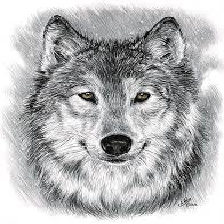

In [20]:
test_img=image.load_img('C:\\Users\\Dell\\Desktop\\DL\\animal_classification\\dataset\\example\\1.jpg',target_size=(224,224))
test_img1=image.img_to_array(test_img)






test_img2=np.expand_dims(test_img1,axis=0)



ypred=animal_model.predict(test_img2)
print(train_set.class_indices)



print('The test image class is :',ypred.argmax())
test_img

{'African LionFish': 0, 'American Bison': 1, 'American White Ibis': 2, 'Andean Condor': 3, 'Ankylosaurus': 4, 'Ant': 5, 'Bald Eagle': 6, 'BigHorn Sheep': 7, 'Black Rat': 8, 'Blue Whale': 9, 'Cat': 10, 'Cheetah': 11, 'Chicken': 12, 'Coelacanth': 13, 'Common BottleNose Dolphin': 14, 'Common Eland': 15, 'Cougar': 16, 'Crested Auklet': 17, 'Crocodile': 18, 'Diplodocus': 19, 'Domestic Cow': 20, 'Domestic Dog': 21, 'Dugong': 22, 'Eastern KingBird': 23, 'Eastern Tiger SwallowTail': 24, 'Gharial': 25, 'Giant Pacific Octopus': 26, 'Gorilla': 27, 'Great HammerHead Shark': 28, 'Great White Shark': 29, 'Green Anaconda': 30, 'Green Iguana': 31, 'Grizzly Bear': 32, 'Hippopotamus': 33, 'Horse': 34, 'Humpback Whale': 35, 'Iguanadon': 36, 'Jaguar': 37, 'Killer Whale': 38, 'King Cobra': 39, 'Komodo Dragon': 40, 'Leopard': 41, 'Lesser Blue Ringed Octopus': 42, 'Lion': 43, 'Modern Humans': 44, 'Monarch Butterfly': 45, 'Northern Flicker': 46, 'Northern Giraffee': 47, 'Northern Harrier': 48, 'Orangutan': 49

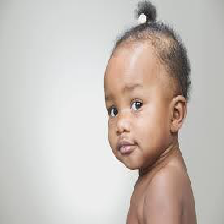

In [21]:
test_img=image.load_img('C:\\Users\\Dell\\Desktop\\DL\\animal_classification\\dataset\\example\\4.jpg',target_size=(224,224))
test_img1=image.img_to_array(test_img)






test_img2=np.expand_dims(test_img1,axis=0)



ypred=animal_model.predict(test_img2)
print(train_set.class_indices)



print('The test image class is :',ypred.argmax())
test_img

{'African LionFish': 0, 'American Bison': 1, 'American White Ibis': 2, 'Andean Condor': 3, 'Ankylosaurus': 4, 'Ant': 5, 'Bald Eagle': 6, 'BigHorn Sheep': 7, 'Black Rat': 8, 'Blue Whale': 9, 'Cat': 10, 'Cheetah': 11, 'Chicken': 12, 'Coelacanth': 13, 'Common BottleNose Dolphin': 14, 'Common Eland': 15, 'Cougar': 16, 'Crested Auklet': 17, 'Crocodile': 18, 'Diplodocus': 19, 'Domestic Cow': 20, 'Domestic Dog': 21, 'Dugong': 22, 'Eastern KingBird': 23, 'Eastern Tiger SwallowTail': 24, 'Gharial': 25, 'Giant Pacific Octopus': 26, 'Gorilla': 27, 'Great HammerHead Shark': 28, 'Great White Shark': 29, 'Green Anaconda': 30, 'Green Iguana': 31, 'Grizzly Bear': 32, 'Hippopotamus': 33, 'Horse': 34, 'Humpback Whale': 35, 'Iguanadon': 36, 'Jaguar': 37, 'Killer Whale': 38, 'King Cobra': 39, 'Komodo Dragon': 40, 'Leopard': 41, 'Lesser Blue Ringed Octopus': 42, 'Lion': 43, 'Modern Humans': 44, 'Monarch Butterfly': 45, 'Northern Flicker': 46, 'Northern Giraffee': 47, 'Northern Harrier': 48, 'Orangutan': 49

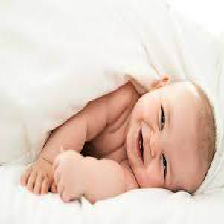

In [22]:
test_img=image.load_img('C:\\Users\\Dell\\Desktop\\DL\\animal_classification\\dataset\\example\\7.jpg',target_size=(224,224))
test_img1=image.img_to_array(test_img)






test_img2=np.expand_dims(test_img1,axis=0)



ypred=animal_model.predict(test_img2)
print(train_set.class_indices)



print('The test image class is :',ypred.argmax())
test_img

{'African LionFish': 0, 'American Bison': 1, 'American White Ibis': 2, 'Andean Condor': 3, 'Ankylosaurus': 4, 'Ant': 5, 'Bald Eagle': 6, 'BigHorn Sheep': 7, 'Black Rat': 8, 'Blue Whale': 9, 'Cat': 10, 'Cheetah': 11, 'Chicken': 12, 'Coelacanth': 13, 'Common BottleNose Dolphin': 14, 'Common Eland': 15, 'Cougar': 16, 'Crested Auklet': 17, 'Crocodile': 18, 'Diplodocus': 19, 'Domestic Cow': 20, 'Domestic Dog': 21, 'Dugong': 22, 'Eastern KingBird': 23, 'Eastern Tiger SwallowTail': 24, 'Gharial': 25, 'Giant Pacific Octopus': 26, 'Gorilla': 27, 'Great HammerHead Shark': 28, 'Great White Shark': 29, 'Green Anaconda': 30, 'Green Iguana': 31, 'Grizzly Bear': 32, 'Hippopotamus': 33, 'Horse': 34, 'Humpback Whale': 35, 'Iguanadon': 36, 'Jaguar': 37, 'Killer Whale': 38, 'King Cobra': 39, 'Komodo Dragon': 40, 'Leopard': 41, 'Lesser Blue Ringed Octopus': 42, 'Lion': 43, 'Modern Humans': 44, 'Monarch Butterfly': 45, 'Northern Flicker': 46, 'Northern Giraffee': 47, 'Northern Harrier': 48, 'Orangutan': 49

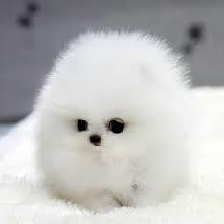

In [23]:
test_img=image.load_img('C:\\Users\\Dell\\Desktop\\DL\\animal_classification\\dataset\\example\\10.jpg',target_size=(224,224))
test_img1=image.img_to_array(test_img)






test_img2=np.expand_dims(test_img1,axis=0)



ypred=animal_model.predict(test_img2)
print(train_set.class_indices)



print('The test image class is :',ypred.argmax())
test_img

In [25]:
test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.efficientnet.preprocess_input)

test_set=test_datagen.flow_from_directory('C:\\Users\\Dell\\Desktop\\DL\\animal_classification\\dataset\\Test',
                                 target_size=(224,224),
                                 shuffle=False,
                                 batch_size=1,     
                                 class_mode='categorical')

filenames = test_set.filenames
nb_samples = len(filenames)

predict = animal_model.predict_generator(test_set,steps = nb_samples)


Found 720 images belonging to 77 classes.
Instructions for updating:
Please use Model.predict, which supports generators.


In [26]:
# Finding Ypred
ypred=predict.argmax(axis=1)
ypred

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
       21,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,
        3,  3,  3,  4,  4,  4, 36,  4,  4,  4, 73,  5,  5,  5,  5,  5,  5,
       24,  6,  6,  6,  6,  6,  6,  6,  6,  3,  7,  7,  7,  7,  7,  7,  7,
        7, 70,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  9, 55,  9,  9, 35, 62, 38, 43, 44, 10, 43, 10, 10, 10,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 13, 58, 13, 38, 10,  3, 13, 13, 14, 14,  9, 14, 14, 14, 14, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 17, 17, 17, 17, 17, 17, 61, 18, 18, 18, 18, 18, 18, 18,
       18, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 43, 20, 74, 74, 21, 21,
       21, 70, 21, 21, 21, 75, 21, 21, 22, 22, 22, 22, 22,  9, 22, 22, 22,
        3, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 67, 24, 25, 25,
       18, 25, 25, 25, 18

In [32]:
# Finding Yact 
yact=test_set.classes
yact

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,
        3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,
        5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21,
       21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22,
       23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 25, 25,
       25, 25, 25, 25, 25

Found 720 images belonging to 77 classes.


<AxesSubplot:>

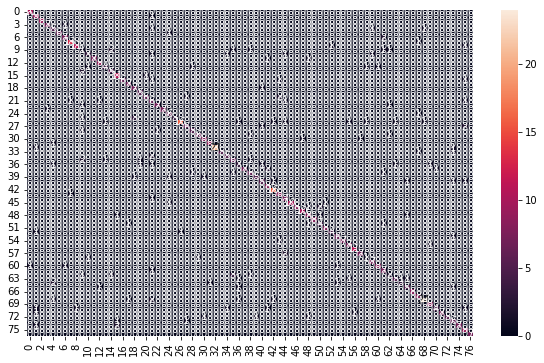

In [38]:
# Providing the classes with labels to make identification better.
test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.efficientnet.preprocess_input)

test_set=test_datagen.flow_from_directory('C:\\Users\\Dell\\Desktop\\DL\\animal_classification\\dataset\\Test',
                                 target_size=(128,128),
                                 shuffle=False,
                                 batch_size=1,     
                                 class_mode='categorical')

filenames = test_set.filenames
nb_samples = len(filenames)

predict = animal_model.predict_generator(test_set,steps = nb_samples)

ypred=predict.argmax(axis=1)

yact=test_set.classes
# Plotting heatmap with confusion matrix to compare yact and ypred.
from sklearn.metrics import confusion_matrix
import seaborn as sb
plt.figure(figsize=(10,6))
sb.heatmap(confusion_matrix(yact,ypred),annot=True,fmt='.0f')

In [29]:

train_set.class_indices

{'African LionFish': 0,
 'American Bison': 1,
 'American White Ibis': 2,
 'Andean Condor': 3,
 'Ankylosaurus': 4,
 'Ant': 5,
 'Bald Eagle': 6,
 'BigHorn Sheep': 7,
 'Black Rat': 8,
 'Blue Whale': 9,
 'Cat': 10,
 'Cheetah': 11,
 'Chicken': 12,
 'Coelacanth': 13,
 'Common BottleNose Dolphin': 14,
 'Common Eland': 15,
 'Cougar': 16,
 'Crested Auklet': 17,
 'Crocodile': 18,
 'Diplodocus': 19,
 'Domestic Cow': 20,
 'Domestic Dog': 21,
 'Dugong': 22,
 'Eastern KingBird': 23,
 'Eastern Tiger SwallowTail': 24,
 'Gharial': 25,
 'Giant Pacific Octopus': 26,
 'Gorilla': 27,
 'Great HammerHead Shark': 28,
 'Great White Shark': 29,
 'Green Anaconda': 30,
 'Green Iguana': 31,
 'Grizzly Bear': 32,
 'Hippopotamus': 33,
 'Horse': 34,
 'Humpback Whale': 35,
 'Iguanadon': 36,
 'Jaguar': 37,
 'Killer Whale': 38,
 'King Cobra': 39,
 'Komodo Dragon': 40,
 'Leopard': 41,
 'Lesser Blue Ringed Octopus': 42,
 'Lion': 43,
 'Modern Humans': 44,
 'Monarch Butterfly': 45,
 'Northern Flicker': 46,
 'Northern Giraffe

The test image class is : 44
The Predicted class name is:
Modern Humans


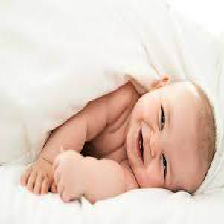

In [31]:
test_img=image.load_img('C:\\Users\\Dell\\Desktop\\DL\\animal_classification\\dataset\\example\\7.jpg',target_size=(224,224))
test_img1=image.img_to_array(test_img)

test_img1=tf.keras.applications.efficientnet.preprocess_input(test_img1)

test_img2=np.expand_dims(test_img1,axis=0)

ypred=animal_model.predict(test_img2)
#print(train_set.class_indices)

print('The test image class is :',ypred.argmax())


class_name=train_set.class_indices

pos=np.array(list(class_name.values()))==ypred.argmax()
name=np.array(list(class_name.keys()))
print('The Predicted class name is:')
print(name[pos][0])
test_img